In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [3]:
fish_multi = pd.read_csv('data/3-6-1-fish_multi.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


In [4]:
fish_multi['species'].value_counts()

species
A    10
B    10
Name: count, dtype: int64

In [5]:
np.mean(fish_multi['length'])

5.5

In [6]:
group = fish_multi.groupby('species')
print(group.mean()) # average length of species

         length
species        
A           4.0
B           7.0


In [7]:
print(group.agg(stats.mode)) # most common value

         length
species        
A        (4, 4)
B        (7, 4)


In [8]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
penguins.query('island == "Torgersen"')['species'].value_counts()

species
Adelie    52
Name: count, dtype: int64

In [11]:
group_penguins = penguins.groupby(['species', 'sex'])
group_penguins.mean(numeric_only=True)['body_mass_g']

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64

In [12]:
group_penguins = penguins.groupby(['species', 'island', 'sex'])
group_penguins.mean(numeric_only=True)['body_mass_g']

species    island     sex   
Adelie     Biscoe     Female    3369.318182
                      Male      4050.000000
           Dream      Female    3344.444444
                      Male      4045.535714
           Torgersen  Female    3395.833333
                      Male      4034.782609
Chinstrap  Dream      Female    3527.205882
                      Male      3938.970588
Gentoo     Biscoe     Female    4679.741379
                      Male      5484.836066
Name: body_mass_g, dtype: float64

In [13]:
penguins[['species', 'body_mass_g']].head()

,species,body_mass_g
0,Adelie,3750.0
1,Adelie,3800.0
2,Adelie,3250.0
3,Adelie,NaN
4,Adelie,3450.0


In [14]:
group_sp = penguins.groupby(['species'])

round(group_sp.sum()['body_mass_g'].Adelie / 151, 3)

3700.662

In [15]:
bins = np.arange(2, 11, 1)
bins

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

<Axes: xlabel='length', ylabel='Count'>

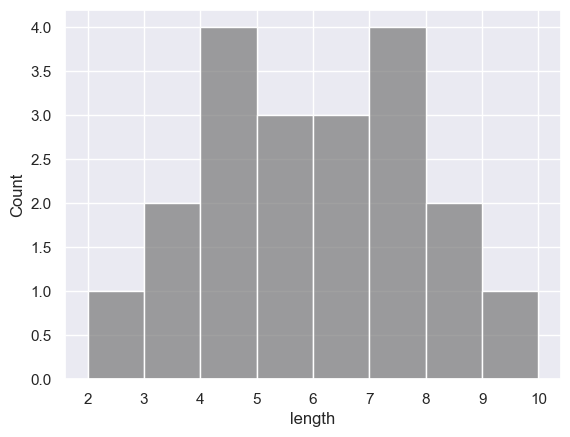

In [16]:
sns.histplot(x='length', data=fish_multi, bins=bins, color='gray')

<Axes: xlabel='length', ylabel='Count'>

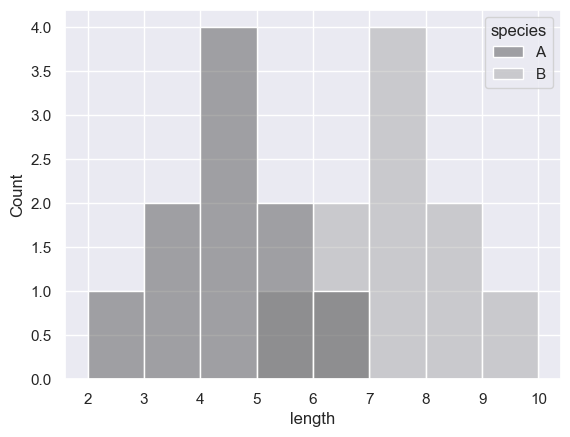

In [18]:
# color 를 species 마다 바꿔줌
sns.histplot(x='length', hue='species', data=fish_multi, bins=bins, palette='gray')